## Exploratory Data Analysis notebook adapted from one by imoore

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

### Loading and inspecting the data

In [2]:
df = pd.read_csv("data/kaggle_car_data_for_eda.csv")
# To display the top 5 rows 
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Checking the types

In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### Cleaning the data: dropping columns and inspecting again

In [4]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### Cleaning the data: renaming columns and inspecting

In [5]:
# imoore thought this was a good idea, so...
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### Cleaning the data: deduping

In [6]:
# what are the dimensions of the data? Rows, Columns
df.shape

(11914, 10)

In [7]:
# There's a simple way to count the duplicates: just use the .duplicated() method:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [8]:
# Get rid of those duplicates and count the rows again:
df = df.drop_duplicates()
df.shape

(10925, 10)

### Cleaning the data: removing nulls

In [9]:
# First count null values to make sure they are not too common:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [10]:
# 69 out of 10,925 is OK, so remove them and count column values
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

### Drawing boxplots to detect outliers

<Axes: xlabel='Year'>

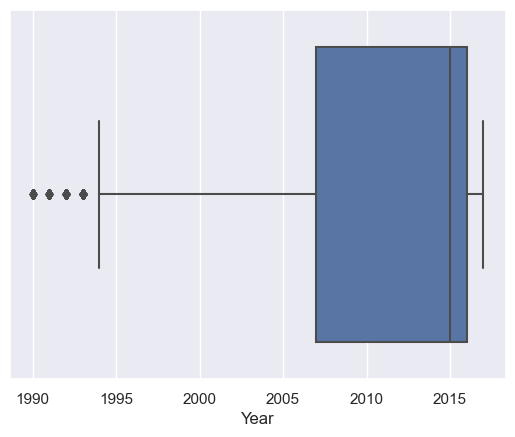

In [11]:
sns.boxplot(x=df['Year'])

In [13]:
# The median year seems to be 2015, so find maximum year
print(df['Year'].max())

2017


In [14]:
# That means half the cars are no more than 2 years old 
# The data is skewed to the left
# How many are from 1990?
count_1990_cars = df[df['Year'] == 1990].shape[0]
print("Number of cars from 1990:", count_1990_cars)

Number of cars from 1990: 67


<Axes: xlabel='HP'>

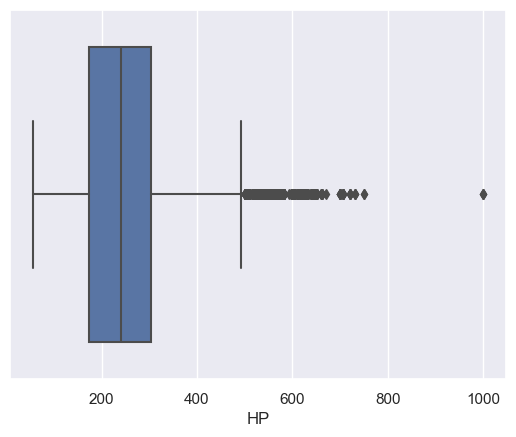

In [15]:
# Now Horsepower:
sns.boxplot(x=df['HP'])

In [17]:
# 3/4 of the cars have under 300 HP.
# What is the max HP?
print(df['HP'].max())

1001.0


In [18]:
# How many have 1001 HP?
count_1001_hp_cars = df[df['HP'] == 1001].shape[0]
print("Number of cars with 1001 HP:", count_1001_hp_cars)

Number of cars with 1001 HP: 3


<Axes: xlabel='Cylinders'>

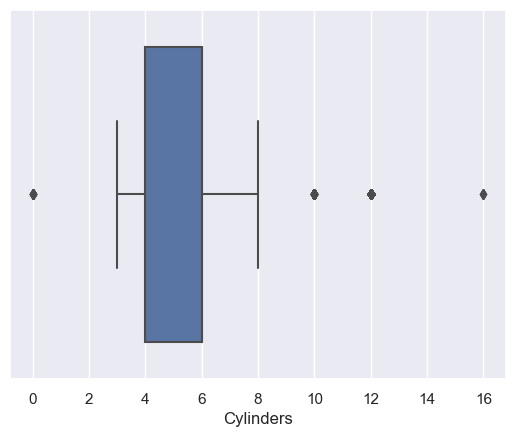

In [19]:
# That's 3 very powerful cars
# What about cylinders?
sns.boxplot(x=df['Cylinders'])

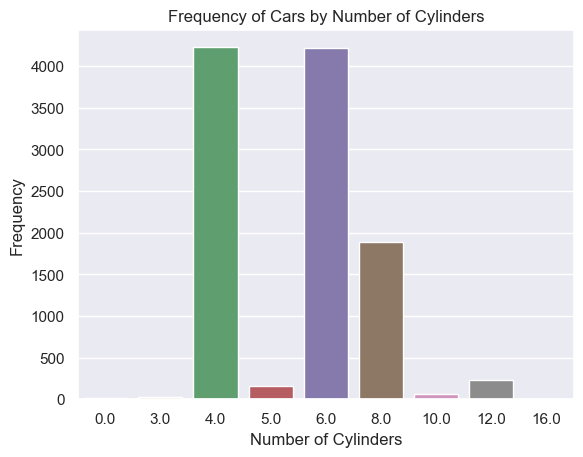

In [32]:
# As expected, 4, 6, 8 but no 5-cylinder engines?  
# There are some with 3, 10, 12 or even 16.
# Let's see how the number of cylinders is distributed

# Create a count plot using Seaborn
sns.countplot(x='Cylinders', data=df)

# Set labels and title
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.title('Frequency of Cars by Number of Cylinders')

# Show the plot
plt.show()

In [29]:
# It would be interesting to look at the one(s) with no cylinders.
cars_with_zero_cylinders = df[df['Cylinders'] == 0]
print(cars_with_zero_cylinders)

               Make                   Model  Year     HP  Cylinders  \
1680  Mercedes-Benz  B-Class Electric Drive  2015  177.0        0.0   
1681  Mercedes-Benz  B-Class Electric Drive  2016  177.0        0.0   
1682  Mercedes-Benz  B-Class Electric Drive  2017  177.0        0.0   
5790            BMW                      i3  2015  170.0        0.0   
5791            BMW                      i3  2016  170.0        0.0   
5792            BMW                      i3  2017  170.0        0.0   
5793            BMW                      i3  2017  170.0        0.0   
9867      Chevrolet                Spark EV  2014  140.0        0.0   
9868      Chevrolet                Spark EV  2014  140.0        0.0   
9869      Chevrolet                Spark EV  2015  140.0        0.0   
9870      Chevrolet                Spark EV  2015  140.0        0.0   
9871      Chevrolet                Spark EV  2016  140.0        0.0   
9872      Chevrolet                Spark EV  2016  140.0        0.0   

     

In [21]:
# I was thinking they'd be rotary - I'd forgotten all about e-cars
# How about the one(s) with more than 8 cylinders?
cars_with_10_plus_cylinders = df[df['Cylinders'] >= 10]
print(cars_with_10_plus_cylinders)

               Make   Model  Year     HP  Cylinders Transmission  \
460         Ferrari    456M  2001  442.0       12.0    AUTOMATIC   
461         Ferrari    456M  2001  442.0       12.0       MANUAL   
462         Ferrari    456M  2002  442.0       12.0    AUTOMATIC   
463         Ferrari    456M  2002  442.0       12.0       MANUAL   
464         Ferrari    456M  2003  442.0       12.0    AUTOMATIC   
...             ...     ...   ...    ...        ...          ...   
11394  Aston Martin  Virage  2012  490.0       12.0    AUTOMATIC   
11395  Aston Martin  Virage  2012  490.0       12.0    AUTOMATIC   
11448   Rolls-Royce  Wraith  2014  624.0       12.0    AUTOMATIC   
11449   Rolls-Royce  Wraith  2015  624.0       12.0    AUTOMATIC   
11450   Rolls-Royce  Wraith  2016  624.0       12.0    AUTOMATIC   

             Drive Mode  MPG-H  MPG-C   Price  
460    rear wheel drive     14      9  223970  
461    rear wheel drive     15      9  219775  
462    rear wheel drive     14      9  

In [22]:
# And the one with 16?
cars_with_16_cylinders = df[df['Cylinders'] == 16]
print(cars_with_16_cylinders)

          Make        Model  Year      HP  Cylinders      Transmission  \
11362  Bugatti  Veyron 16.4  2008  1001.0       16.0  AUTOMATED_MANUAL   
11363  Bugatti  Veyron 16.4  2008  1001.0       16.0  AUTOMATED_MANUAL   
11364  Bugatti  Veyron 16.4  2009  1001.0       16.0  AUTOMATED_MANUAL   

            Drive Mode  MPG-H  MPG-C    Price  
11362  all wheel drive     14      8  2065902  
11363  all wheel drive     14      8  1500000  
11364  all wheel drive     14      8  1705769  


<Axes: xlabel='MPG-H'>

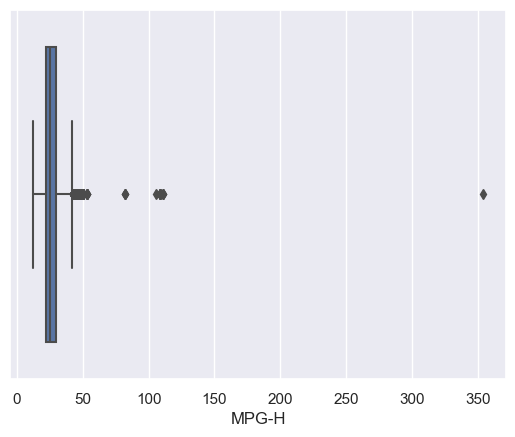

In [23]:
# Very nice. What else? MPG, just highway
sns.boxplot(x=df['MPG-H'])

<Axes: xlabel='Price'>

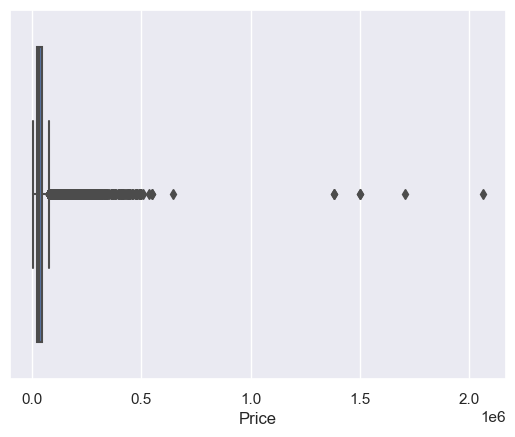

In [24]:
# A fairly symmetrical distribution with the median at around 24
# Finally, Price
sns.boxplot(x=df['Price'])

<Axes: xlabel='Price'>

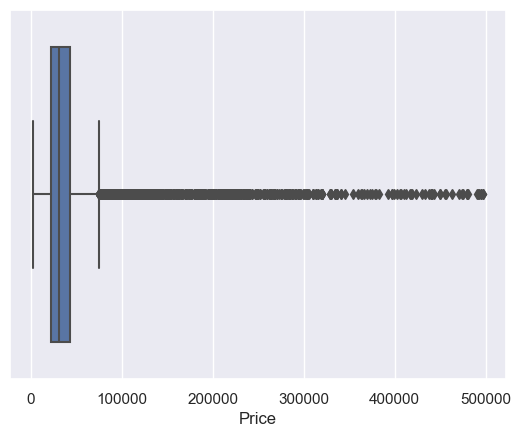

In [27]:
# The high outliers mean the scale is in millions, so plot without them:
not_supercars = df[df['Price'] < 500000]
sns.boxplot(x=not_supercars['Price'])

<Axes: xlabel='Price'>

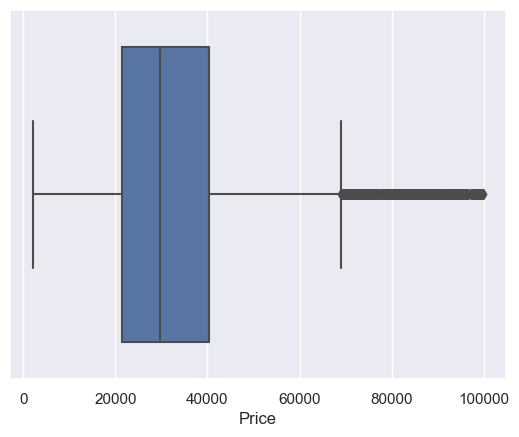

In [28]:
# Even that was too skewed to the right so cut off at 100,000
not_supercars = df[df['Price'] < 100000]
sns.boxplot(x=not_supercars['Price'])

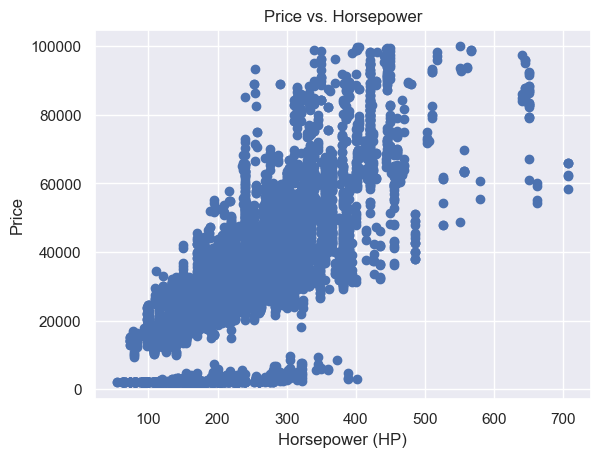

In [35]:
# Most cars are less than £40,000 with the median price at about £28,000
# Things have changed since I used to buy Minis for about £500
# What happens if you plot of price against HP?

# Create a scatter plot
plt.scatter(not_supercars['HP'], not_supercars['Price'])

# Set labels and title
plt.xlabel('Horsepower (HP)')
plt.ylabel('Price')
plt.title('Price vs. Horsepower')

# Show the plot
plt.show()

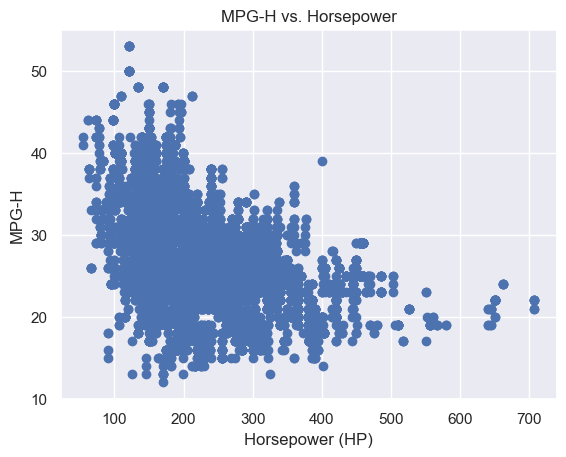

In [40]:
# More powerful cars tend to be more expensive
# I would think that the more powerful cars tend to have lower MPG:

not_supercars = df[(df['Price'] < 100000) & (df['MPG-H'] < 60)]

# Create a scatter plot
plt.scatter(not_supercars['HP'], not_supercars['MPG-H'])

# Set labels and title
plt.xlabel('Horsepower (HP)')
plt.ylabel('MPG-H')
plt.title('MPG-H vs. Horsepower')

# Show the plot
plt.show()

In [43]:
# That was a good guess
# How about producing a grid of correlations?

# Selecting only the desired columns from the not_supercars DataFrame
selected_columns = ['Year', 'HP', 'Cylinders', 'MPG-H', 'Price']
selected_data = not_supercars[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)


               Year        HP  Cylinders     MPG-H     Price
Year       1.000000  0.350383  -0.094262  0.352434  0.591496
HP         0.350383  1.000000   0.722852 -0.446039  0.763024
Cylinders -0.094262  0.722852   1.000000 -0.692746  0.400514
MPG-H      0.352434 -0.446039  -0.692746  1.000000 -0.119202
Price      0.591496  0.763024   0.400514 -0.119202  1.000000


C:\Users\cbutt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cbutt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cbutt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cbutt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

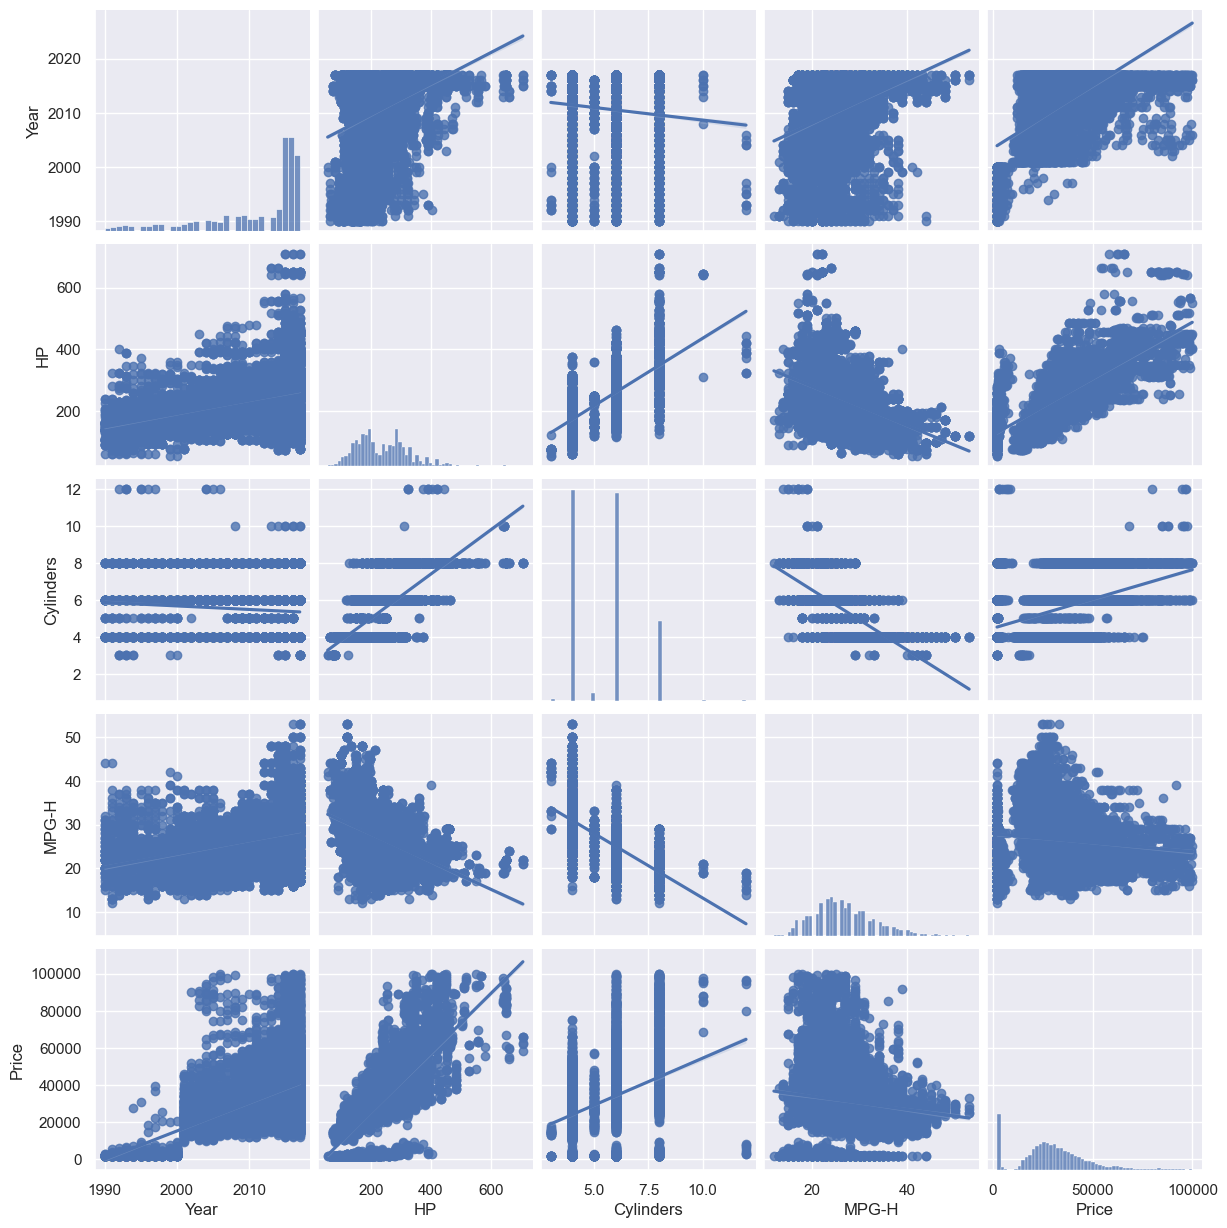

In [44]:
# Plot the regression matrix
sns.pairplot(selected_data, kind='reg')

# Show the plot
plt.show()